# Udacity Nano-degree project 2

## Introduction: The "We_rate_dogs" Twitter account

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.I will be wrangling this dataset.

### Step 1: Loading in the required packages

In [65]:
import pandas as pd
import numpy as np
import requests
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [66]:
# downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
dogs_archive = pd.read_csv('C:/Users/HP/Downloads/twitter-archive-enhanced.csv')

In [67]:
#Let's take a glance at the top rows of the dataset
dogs_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [68]:
dogs_archive.shape

(2356, 17)

In [69]:
# I will now programmatically download the dog image prediction files, using the Requests library, with the provided url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
print(response.status_code)

200


In [70]:
# I will now create a new directory, where I will save the tsv file above, using the os.mkdir() function of the OS library
if os.path.exists("dogs/") is False:
    os.mkdir("dogs/")
else:
    print("Path is non-existent!")

Path is non-existent!


In [71]:
#fantastic! Now, I shall save/write the tsv file into the directory
with open(os.path.join("dogs/", url.split("/")[-1]), mode="wb") as file:
    file.write(response.content)

# I will now check to see if the file has been saved in my directory
os.listdir("dogs/")

['image-predictions.tsv']

In [72]:
#The next sub-step is to read the file in my new directory into a dataframe, which I will call 'df_predictions'
df_predictions = pd.read_csv('dogs/image-predictions.tsv', sep = '\t')

In [73]:
df_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [74]:
#The next sub-step is loading the json.txt file 
tweet_lines=[]
with open('C:/Users/HP/Downloads/tweet-json.txt', 'r')as file:
    for line in file:
        data=json.loads(line)
        tweet_lines.append(data)

In [75]:
tweets_json = pd.DataFrame(tweet_lines, columns={'id', 'retweet_count', 'favorite_count'})

In [76]:
tweets_json.head(2)

,retweet_count,id,favorite_count
0,8853,892420643555336193,39467
1,6514,892177421306343426,33819


### Step 2: Programmatic and visual assessment

In [77]:
#Let's start off by looking at dogs_archive dataframe
dogs_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [78]:
#Checking for duplicate values
sum(dogs_archive.duplicated())

0

In [79]:
#Checking the names and frequency count of each value
dogs_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [80]:
dogs_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [81]:
#Let's have a closer look at the key indices of the dataset, by looking at the descriptive stats
dogs_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [82]:
dogs_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [83]:
dogs_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [84]:
dogs_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [85]:
dogs_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [86]:
#Next, we will take a closer look into the tweets_json dataframe
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   retweet_count   2354 non-null   int64
 1   id              2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [87]:
#Last but not the least, I will also be taking a closer look at 'df_predictions'
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [88]:
# Taking a closer look at the table above, its obvious that we could perform a join between it and the dogs_archive dataframe
# we would have to screen and see which if all tweet ids present in df_predictions are also present in dogs_archive

len(df_predictions[~df_predictions.tweet_id.isin(dogs_archive.tweet_id)])

0

In [89]:
len(dogs_archive[~dogs_archive.tweet_id.isin(df_predictions.tweet_id)])

281

Quality related issues in the data frames

1. Some of the columns have too many null values, some of the columns contain information that is of no value during assessment, such as the 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls','text' and 'timestamp'. These columns will be dropped.

2. Some values in the column 'rating_denominator' are greater than or less than 10, this may be due to some data entry related errors, as such any value less than or greater than ten will be replaced with ten, such that all denominator_rating values will be ten throughout.

3. Some values in the column 'rating_numerator' are massively deviated away from the mean, such as the value '1776', such values will be replaced by the mean.

4. The archive contains duplicates entries in the form of retweets, those rows should be deleted.

5. There is an inequality in terms of the number of tweet id's when compared to the dogs_archive dataframe. I will be deleting the rows of data which are found in the dogs_archive but not in the df_predictions dataframe, in order to have a seamless merge between the two tables.

6. The columns titled "jpg-url" and "img-num" will be deleted as they are inconsiquential in the grand scheme of things, as far as analysis is concerned.

7. The column "Source" which contains details of the platform from which posters sent in their pictures will be refined and stripped of the unnecessary details in the HTML anchor tag, leaving on the names of the platforms.

8. Names such as "the", "an", "a", "None" will all be deleted

9. Values which are true under P1_dog predictions table will be kept, while false predictions will be deleted.

Tidyness issue

1. The table dogs_archive will be merged with the JSON.txt table and the engagements table to make it easier to analyse the data

2. Numerator_rating and Denominator_rating columns will be combined into a single column, in a fraction form (X/Y). The new column will be called Cuteness_rating, while the Numerator_rating and Denominator_rating columns will be deleted.


### Step 3: Cleaning the data

In [90]:
#I start off by making copies of the dataframes

dogs_clean = dogs_archive.copy()
df_predictions_clean = df_predictions.copy()
tweet_engagements = tweets_json.copy()

### Quality Issue 1: Removing null values in the retweetwd_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id columns

In [91]:
dogs_clean = dogs_clean[~(dogs_clean.retweeted_status_id.notnull())]
dogs_clean = dogs_clean[~(dogs_clean.in_reply_to_status_id.notnull())]

In [92]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [93]:
dogs_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'text'], inplace=True)

In [94]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   source              2097 non-null   object
 2   expanded_urls       2094 non-null   object
 3   rating_numerator    2097 non-null   int64 
 4   rating_denominator  2097 non-null   int64 
 5   name                2097 non-null   object
 6   doggo               2097 non-null   object
 7   floofer             2097 non-null   object
 8   pupper              2097 non-null   object
 9   puppo               2097 non-null   object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


### Quality issue 2: Cleaning inconsistencies in values of the column "rating_denominator"

In [95]:
#We will now check for locations where the rating_denominator is less than 10
mask = dogs_clean.query('rating_denominator < 10')
mask

,tweet_id,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,"<a href=""http://twitter.com/download/iphone"" r...","https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [96]:
#lets replace these values in the tibble above generated from our query with the standard value of '10'
mask = dogs_clean['rating_denominator'] < 10
dogs_clean.loc[mask, 'rating_denominator'] = 10

In [97]:
#lets query the dataframe to assess if the change has been made
mask = dogs_clean.query('rating_denominator < 10')
mask

,tweet_id,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [98]:
mask = dogs_clean.query('rating_denominator > 10')
mask

,tweet_id,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


In [99]:
#we will perform the same operation as earlier by replacing all of these values with 10
mask = dogs_clean['rating_denominator'] > 10
dogs_clean.loc[mask, 'rating_denominator'] = 10

### Quality Issue 3: Cleaning inconsistencies in the values of "rating_numerator"

In [100]:
#In this next step, we will consider the rating_numerator column, which has alot of outliers, leading to inconsistencies in
# the scoring system. I will replace all numerators greater than the mean, by the mean rounded off 
#to 2 significant figures. i.e 13
mask = dogs_clean['rating_numerator'] > 13.126486
dogs_clean.loc[mask, 'rating_numerator'] = 13

In [101]:
# In the next step, I will be converting the numerator and denominator into strings, before combining them into fraction form and 
# loading them into a new column, which I will merge into the dogs_clean dataframe using pandas 'pd.concat'
dogs_clean['rating_denominator'] = dogs_clean['rating_denominator'].astype(str)
dogs_clean['rating_numerator'] = dogs_clean['rating_numerator'].astype(str)

### Tidyness Issue 1: Combining rating numerator and rating numerator into a single column "cuteness_rating" and deleting the former columns

In [102]:
# combining numerator and denominator and creat a new column called "cuteness_rating"
dogs_clean["cuteness_rating"] = dogs_clean["rating_numerator"] + "/" + dogs_clean["rating_denominator"]
dogs_clean.head()

,tweet_id,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,cuteness_rating
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13/10
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,13/10
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,12/10
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,13/10
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,12/10


In [103]:
# I will now drop the rating_numerator and rating_denominator columns
dogs_clean.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

### Quality issue 4: Extracting the names of the platforms from which posts were made from the HTML anchor tags

In [104]:
#In this next step, I will be cleaning the 'source' column. Right now, the relevant information is enclosed in between the 
#HTML anchor <a> tags, I will be removing all the links and leaving the information regarding which platform the person is 
# making a post from

dogs_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [105]:
#I will now use a regex code to extract the relevant information between the tags
dogs_clean.source = dogs_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
dogs_clean.head(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_13240\2469632930.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dogs_clean.source = dogs_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')


,tweet_id,source,expanded_urls,name,doggo,floofer,pupper,puppo,cuteness_rating
0,892420643555336193,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,13/10
1,892177421306343426,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,13/10


In [106]:
#Fantastic! the code works, I will now convert the 4 different variables to categorical variables, so that we can 
#make comparisons between them easily
dogs_clean["source"] = dogs_clean["source"].astype("category")

In [107]:
#The next step will be cleaning and merging the image predictions table with our dogs_clean table
df_predictions_clean.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1246,747594051852075008,https://pbs.twimg.com/media/Cl_80k5WkAEbo9m.jpg,1,basenji,0.389136,True,dingo,0.270226,False,Chihuahua,0.098939,True
290,671166507850801152,https://pbs.twimg.com/media/CVB2TnWUYAA2pAU.jpg,1,refrigerator,0.829772,False,toilet_seat,0.030083,False,shower_curtain,0.015461,False


### Quality issue 5: Dropping unnecessary columns

In [108]:
df_predictions_clean.drop(columns=['jpg_url', 'img_num', 'p1_conf', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

In [109]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   p1        2075 non-null   object
 2   p1_dog    2075 non-null   bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 34.6+ KB


### Tidyness issue 2: Merging all three tables to form one cleaned table

In [110]:
dogs_clean = dogs_clean.merge(df_predictions_clean, how='left', left_on='tweet_id', right_on='tweet_id')

In [111]:
#I will now rename the id column of the tweer_engagements dataframe to tweet_id
tweet_engagements.rename({'id':'tweet_id'}, axis=1, inplace=True)

In [112]:
tweet_engagements['favorite_count'] = tweet_engagements.favorite_count.astype('Int64')
tweet_engagements['retweet_count'] = tweet_engagements.retweet_count.astype('Int64')

In [113]:
dogs_clean["name"] = dogs_clean["name"].astype("category")

In [114]:
dogs_clean["p1"] = dogs_clean["p1"].astype("category")

In [115]:
dogs_clean["cuteness_rating"] = dogs_clean["cuteness_rating"].astype("category")

In [116]:
dogs_clean = dogs_clean.merge(tweet_engagements, how='left', left_on='tweet_id', right_on='tweet_id')


In [117]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   tweet_id         2097 non-null   int64   
 1   source           2097 non-null   category
 2   expanded_urls    2094 non-null   object  
 3   name             2097 non-null   category
 4   doggo            2097 non-null   object  
 5   floofer          2097 non-null   object  
 6   pupper           2097 non-null   object  
 7   puppo            2097 non-null   object  
 8   cuteness_rating  2097 non-null   category
 9   p1               1971 non-null   category
 10  p1_dog           1971 non-null   object  
 11  retweet_count    2097 non-null   Int64   
 12  favorite_count   2097 non-null   Int64   
dtypes: Int64(2), category(4), int64(1), object(6)
memory usage: 231.8+ KB


In [118]:
dogs_clean.drop(columns=['expanded_urls'], inplace=True)

In [119]:
dogs_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [120]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   tweet_id         2097 non-null   int64   
 1   source           2097 non-null   category
 2   name             2097 non-null   category
 3   cuteness_rating  2097 non-null   category
 4   p1               1971 non-null   category
 5   p1_dog           1971 non-null   object  
 6   retweet_count    2097 non-null   Int64   
 7   favorite_count   2097 non-null   Int64   
dtypes: Int64(2), category(4), int64(1), object(1)
memory usage: 149.9+ KB


# Quality issue 6: Deleting incorrect names from the data frame

In [121]:
incorrect_names = list(dogs_clean.query('name == "a" or name == "an" or name == "the"').index)

In [122]:
for j in incorrect_names:
    dogs_clean.name[j] = "None"

In [123]:
dogs_clean = dogs_clean.query('name != "None"')

In [124]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 2067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   tweet_id         1425 non-null   int64   
 1   source           1425 non-null   category
 2   name             1425 non-null   category
 3   cuteness_rating  1425 non-null   category
 4   p1               1379 non-null   category
 5   p1_dog           1379 non-null   object  
 6   retweet_count    1425 non-null   Int64   
 7   favorite_count   1425 non-null   Int64   
dtypes: Int64(2), category(4), int64(1), object(1)
memory usage: 118.4+ KB


### Quality issue 7: Correcting tweet_id to the correct data type

In [125]:
dogs_clean['tweet_id'] = dogs_clean['tweet_id'].astype(str)

### Quality issue 8: Deleting columns with false p1_dog ratings 

In [126]:
# This will help us further scale down the data
dogs_clean = dogs_clean.query("p1_dog==True")
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 1 to 2066
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   tweet_id         1062 non-null   object  
 1   source           1062 non-null   category
 2   name             1062 non-null   category
 3   cuteness_rating  1062 non-null   category
 4   p1               1062 non-null   category
 5   p1_dog           1062 non-null   object  
 6   retweet_count    1062 non-null   Int64   
 7   favorite_count   1062 non-null   Int64   
dtypes: Int64(2), category(4), object(2)
memory usage: 101.4+ KB


In [127]:
#saving....
dogs_clean.to_csv('twitter_archive_master.csv', index = False)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'TweetDeck'),
  Text(1, 0, 'Twitter Web Client'),
  Text(2, 0, 'Twitter for iPhone'),
  Text(3, 0, 'Vine - Make a Scene')])

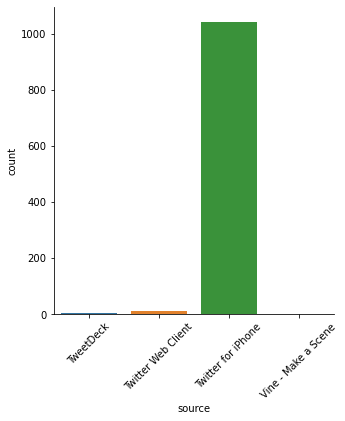

In [128]:
sns.catplot(x ="source",
kind ="count", data = dogs_clean)
plt.xticks(rotation=45)

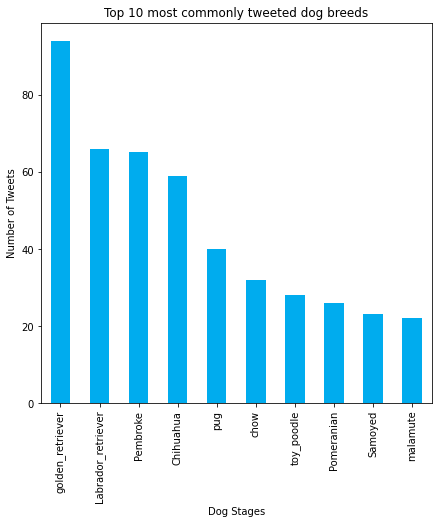

In [129]:
# top 10 dog breeds.
breed_values = dogs_clean.p1.value_counts(ascending=False)
breed_values[:10].plot(kind='bar',color='#00acee',figsize=(7,7))
plt.title('Top 10 most commonly tweeted dog breeds')
plt.ylabel('Number of Tweets')
plt.xlabel('Dog Stages');

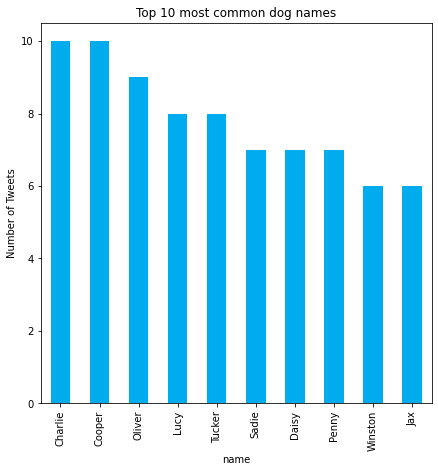

In [130]:
# Plot the top 10 dog names.
breed_values = dogs_clean.name.value_counts(ascending=False)
breed_values[:10].plot(kind='bar',color='#00acee',figsize=(7,7))
plt.title('Top 10 most common dog names')
plt.ylabel('Number of Tweets')
plt.xlabel('name');

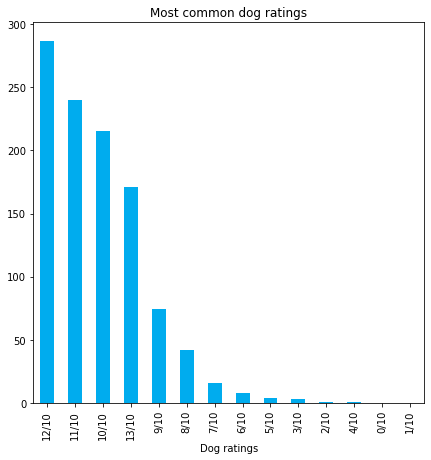

In [131]:
rating_values = dogs_clean.cuteness_rating.value_counts(ascending=False)
rating_values.plot(kind='bar',color='#00acee',figsize=(7,7))
plt.title('Most common dog ratings')
plt.xlabel('Dog ratings');